# Classification

Several models will be trialed out:

- VADER

- 
FinBERT


## 1) VADER

Runs on non-preprocessed, raw dataset.

Ref: https://github.com/cjhutto/vaderSentiment 

In [ ]:
!pip install vaderSentiment

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [23]:
# load dataset as a list of strings
import csv

with open('../data/cleaned_data.csv', newline='', encoding = 'cp850') as f:
    reader = csv.reader(f)
    data = list(reader)

In [24]:
print(len(data))

7237


In [25]:
new_data = [x[9] for x in data]

# remove the first element which is 'cleaned_text'
new_data = new_data[1:]

new_data[:5]

['lately seen big drops capacity utilization european areas however dont understand yet read graphs hope mean exactly',
 'make sure wsb discord https check earnings thread https rules https dm mod inbox https',
 'convinced mom give grand trade split profit put nvda wants give know got hella lucky way could recreate profits',
 'aggressive advertising strategy allocating substantial revenues compared palantir conservative raises concerns sustainability genuine value offerings company approach imitating successful trends similar behaviors observed dotcom bubble suggests lack genuine innovation potential financial instability coupled criticisms developing products merely gather customers acquisition rather creating lasting value positions unfavorably eyes skeptics question viability contribution ai industry adding earnings coming next week buying puts would love hear anyone alternative thesis copycat https',
 'nvidia amd first movers ai revolution let assume upside somewhat limited even re

In [26]:
# test on first 5 samples
scores = []
for sentence in new_data[:5]:
    vs = analyzer.polarity_scores(sentence)
    scores.append(vs)
    
    print("{:-<10} {}".format(sentence, str(vs)))

lately seen big drops capacity utilization european areas however dont understand yet read graphs hope mean exactly {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
make sure wsb discord https check earnings thread https rules https dm mod inbox https {'neg': 0.15, 'neu': 0.722, 'pos': 0.128, 'compound': -0.1027}
convinced mom give grand trade split profit put nvda wants give know got hella lucky way could recreate profits {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.9273}
aggressive advertising strategy allocating substantial revenues compared palantir conservative raises concerns sustainability genuine value offerings company approach imitating successful trends similar behaviors observed dotcom bubble suggests lack genuine innovation potential financial instability coupled criticisms developing products merely gather customers acquisition rather creating lasting value positions unfavorably eyes skeptics question viability contribution ai industry adding earnings 

In [29]:
%%time
vader_scores = []
for i, sentence in enumerate(new_data):
    vs = analyzer.polarity_scores(sentence)
    print(vs)
    vader_scores.append(vs)

{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}
{'neg': 0.15, 'neu': 0.722, 'pos': 0.128, 'compound': -0.1027}
{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.9273}
{'neg': 0.086, 'neu': 0.682, 'pos': 0.232, 'compound': 0.9217}
{'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.4601}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.7003}
{'neg': 0.252, 'neu': 0.583, 'pos': 0.165, 'compound': -0.6597}
{'neg': 0.138, 'neu': 0.623, 'pos': 0.239, 'compound': 0.802}
{'neg': 0.107, 'neu': 0.649, 'pos': 0.244, 'compound': 0.7964}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'compound': 0.5994}
{'neg': 0.023, 'neu': 0.759, 'pos': 0.218, 'compound': 0.9658}
{'neg': 0.012, 'neu': 0.655, 'pos': 0.333, 'compound': 0.9939}
{'neg': 0.088, 'neu': 0.761, 'pos': 0.15, 'compound': 0.9517}
{'neg': 0.044, 'neu': 0.525, 'pos': 0.431, 'compound': 0.9607}
{'neg': 0.126, 'neu': 0.747, 'pos': 0.127, 'compound': 0.5106}
{'neg': 0.033

In [28]:
print(scores[:5])

[{'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.4404}, {'neg': 0.15, 'neu': 0.722, 'pos': 0.128, 'compound': -0.1027}, {'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compound': 0.9273}, {'neg': 0.086, 'neu': 0.682, 'pos': 0.232, 'compound': 0.9217}, {'neg': 0.121, 'neu': 0.879, 'pos': 0.0, 'compound': -0.4601}]


In [ ]:
str_scores = [str(x) for x in scores]

In [ ]:
del str_scores[0]

In [ ]:
str_scores[:5]

In [45]:
new_data[:5]

['lately seen big drops capacity utilization european areas however dont understand yet read graphs hope mean exactly',
 'make sure wsb discord https check earnings thread https rules https dm mod inbox https',
 'convinced mom give grand trade split profit put nvda wants give know got hella lucky way could recreate profits',
 'aggressive advertising strategy allocating substantial revenues compared palantir conservative raises concerns sustainability genuine value offerings company approach imitating successful trends similar behaviors observed dotcom bubble suggests lack genuine innovation potential financial instability coupled criticisms developing products merely gather customers acquisition rather creating lasting value positions unfavorably eyes skeptics question viability contribution ai industry adding earnings coming next week buying puts would love hear anyone alternative thesis copycat https',
 'nvidia amd first movers ai revolution let assume upside somewhat limited even re

In [46]:
import numpy as np
np.savetxt('../data/vader_scores.csv', [p for p in zip(new_data, str_scores)], delimiter=',',fmt='%s', encoding='utf-8')

## 2) FinBERT

ref: https://huggingface.co/ProsusAI/finbert

In [ ]:
# Install the transformers library
!pip install datasets transformers==4.28.0
!pip install --upgrade accelerate

In [6]:
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

C:\Users\ngzhe\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ngzhe\.cache\huggingface\hub\models--ProsusAI--finbert. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

In [9]:
import csv
# use preprocessed dataframe for FinBERT
with open('../data/processed_df.csv', newline='', encoding = 'cp850') as f:
    reader = csv.reader(f)
    data = list(reader)

In [10]:
pred_texts = [x[1] for x in data][1:] # remove the first element which is header

pred_texts[:5]

['my art ai',
 'perfect batman doji',
 'aiir commentary 12202023',
 'halving coming soon',
 'when satcent parity']

In [17]:
# to avoid SizeMismatch error later on, truncate all strings to length = 512
pred_texts2 = [elem[:512] for elem in pred_texts]

In [18]:
ner_results = pipe('when satcent parity')[0]
print(ner_results)

[{'label': 'neutral', 'score': 0.9438214898109436}]


In [19]:
%%time
finbert_scores = []
for text in pred_texts2:
    try:
        results = pipe(text)
        print(results)
        finbert_scores.append(results[0])
    except:
        finbert_scores.append('ERROR')
print('done')

[{'label': 'neutral', 'score': 0.9064484238624573}]
[{'label': 'neutral', 'score': 0.9065033793449402}]
[{'label': 'neutral', 'score': 0.9203070402145386}]
[{'label': 'neutral', 'score': 0.5600285530090332}]
[{'label': 'neutral', 'score': 0.9438214898109436}]
[{'label': 'neutral', 'score': 0.9326279759407043}]
[{'label': 'neutral', 'score': 0.9254570007324219}]
[{'label': 'neutral', 'score': 0.9156442284584045}]
[{'label': 'neutral', 'score': 0.9423116445541382}]
[{'label': 'neutral', 'score': 0.8856667876243591}]
[{'label': 'neutral', 'score': 0.919280469417572}]
[{'label': 'neutral', 'score': 0.9138869047164917}]
[{'label': 'neutral', 'score': 0.9143662452697754}]
[{'label': 'neutral', 'score': 0.9461055397987366}]
[{'label': 'neutral', 'score': 0.8037098050117493}]
[{'label': 'neutral', 'score': 0.9054892063140869}]
[{'label': 'neutral', 'score': 0.940925657749176}]
[{'label': 'neutral', 'score': 0.9277826547622681}]
[{'label': 'neutral', 'score': 0.920543372631073}]
[{'label': 'neu

In [20]:
finbert_scores[:5]

[{'label': 'neutral', 'score': 0.9064484238624573},
 {'label': 'neutral', 'score': 0.9065033793449402},
 {'label': 'neutral', 'score': 0.9203070402145386},
 {'label': 'neutral', 'score': 0.5600285530090332},
 {'label': 'neutral', 'score': 0.9438214898109436}]

In [21]:
len(finbert_scores)

9905

In [30]:
import numpy as np
np.savetxt('../data/finbert_scores.csv', [p for p in zip(new_data, finbert_scores)], delimiter=',',fmt='%s', encoding='utf-8')

# Evaluation

Using F1 metrics etc

Note the time of predcition as well! By using `%%time` at the start of the cell


### Preparing Evaluation Set

In [37]:
import pandas as pd
eval_set = pd.read_csv('../data/eval_set_labelled.csv')

In [38]:
eval_set[:5]

,Unnamed: 0,data,subjectivity,sentiment
0,1,"BlackRock, ProShares Bitcoin ETFs Surpass GBTC...",neutral,neutral
1,2,Stock Up 400%! Pampa Metals $PMMCF Options New...,opinionated,positive
2,3,Ethereum (ETH) Approaches $4000 In Multi-Week ...,neutral,neutral
3,4,"After a 141% Surge, Golden Inu's Appears To Be...",neutral,neutral
4,5,(10/18) Tuesday's Pre-Market Stock Movers & Ne...,opinionated,positive


In [39]:
eval = eval_set[['data','sentiment']].copy()

In [40]:
eval[:5]

,data,sentiment
0,"BlackRock, ProShares Bitcoin ETFs Surpass GBTC...",neutral
1,Stock Up 400%! Pampa Metals $PMMCF Options New...,positive
2,Ethereum (ETH) Approaches $4000 In Multi-Week ...,neutral
3,"After a 141% Surge, Golden Inu's Appears To Be...",neutral
4,(10/18) Tuesday's Pre-Market Stock Movers & Ne...,positive


## Evaluation on VADER

Run VADER on Evaluation Set

In [47]:
vader_eval_prob = []
vader_eval_cat = []

for sentence in eval.data:
    vs = analyzer.polarity_scores(sentence)
    del vs['compound'] # delete composite score before doing argmax()
    pred_cat = max(vs, key=vs.get) # argmax over keys
    prob = vs[pred_cat]
    
    vader_eval_cat.append(pred_cat)
    vader_eval_prob.append(prob)

eval["vader_category"] = vader_eval_cat
eval["vader_prob"] = vader_eval_prob

print(eval[:5])

neu 1.0
neu 1.0
neu 0.769
neu 1.0
neu 0.889
neu 0.871
neu 0.82
neu 0.874
neu 0.776
neu 1.0
neu 0.908
neu 0.807
neu 0.975
neu 0.873
neu 1.0
neu 0.839
neu 0.777
neu 0.813
neu 0.832
neu 1.0
neu 0.899
neu 1.0
neu 0.76
neu 0.789
neu 0.829
neu 0.686
neu 0.944
neu 0.847
neu 0.878
neu 1.0
neu 0.763
neu 0.571
neu 0.84
neu 1.0
neu 0.815
neu 0.841
neu 0.729
neu 0.866
neu 0.83
neu 0.812
neu 1.0
neu 0.777
neu 0.739
neu 0.915
neu 0.798
neu 1.0
neu 0.84
neu 1.0
neu 1.0
neu 1.0
neu 0.876
neu 1.0
neu 0.888
neu 0.791
neu 0.903
neu 0.844
neu 0.845
neu 0.835
neu 0.865
neu 0.846
neu 1.0
neu 0.797
neu 0.561
neu 0.883
neu 0.698
neu 0.858
neu 0.847
neu 0.812
neu 1.0
neu 0.864
neu 0.87
neu 0.817
neu 0.843
neu 0.801
neu 1.0
neu 0.851
neu 0.809
neu 0.688
neu 1.0
neu 0.618
neu 0.823
neu 0.844
neu 0.758
neu 0.845
neu 0.929
neu 0.885
neu 0.878
neu 1.0
neu 0.715
neu 0.904
neu 0.937
neu 0.909
neu 0.796
neu 0.881
neu 1.0
neu 0.776
neu 1.0
neu 0.926
neu 1.0
neu 1.0
neu 1.0
neu 1.0
neu 0.898
neu 1.0
neu 1.0
neu 0.924
ne

In [48]:
eval[:5]

,data,sentiment,vader_category,vader_prob
0,"BlackRock, ProShares Bitcoin ETFs Surpass GBTC...",neutral,neu,1.000
1,Stock Up 400%! Pampa Metals $PMMCF Options New...,positive,neu,1.000
2,Ethereum (ETH) Approaches $4000 In Multi-Week ...,neutral,neu,0.769
3,"After a 141% Surge, Golden Inu's Appears To Be...",neutral,neu,1.000
4,(10/18) Tuesday's Pre-Market Stock Movers & Ne...,positive,neu,0.889


In [64]:
# calculate accuracy, f1 etc
from sklearn.metrics import f1_score

y_true = eval['sentiment'].map({'negative':0, 'neutral':1, 'positive':2}).tolist()
y_pred = eval['vader_category'].map({'neg':0, 'neu':1, 'pos':2}).tolist()
target_names = ['Negative', 'Neutral', 'Positive']

print(y_true[:5])
print(y_pred[:5])

[1, 2, 1, 1, 2]
[1, 1, 1, 1, 1]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0.0))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       192
     Neutral       0.56      1.00      0.72       560
    Positive       0.67      0.02      0.03       251

    accuracy                           0.56      1003
   macro avg       0.41      0.34      0.25      1003
weighted avg       0.48      0.56      0.41      1003



In [60]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
f1_score(y_true, y_pred, average='micro')

0.5603190428713859

F1 score > 0.9 is considered excellent. A score between 0.8 and 0.9 is considered good, while a score between 0.5 to 0.8 is considered average. If the F1 score falls below 0.5, then the model is considered to have a poor performance.

Therefore, VADER achieves average performance on evaluation set.

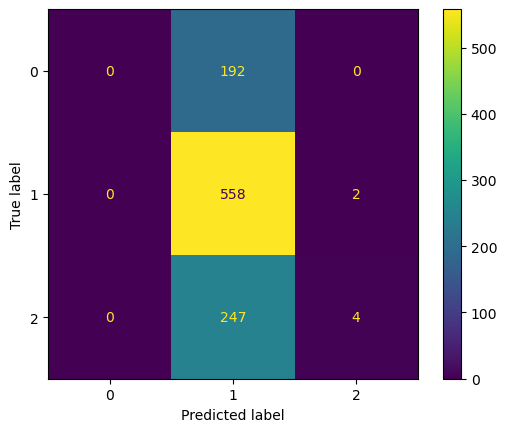

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Evaluation on FinBERT

Run FinBERT on Evaluation Set

In [68]:
finbert_eval_prob = []
finbert_eval_cat = []

for sentence in eval.data:
    sentence = sentence[:512] # to avoid SizeMismatch error later on, truncate all strings to length = 512

    ner_results = pipe(sentence)[0]

    pred_cat = ner_results['label']
    prob = ner_results['score']
    
    finbert_eval_cat.append(pred_cat)
    finbert_eval_prob.append(prob)

eval["finbert_category"] = finbert_eval_cat
eval["finbert_prob"] = finbert_eval_prob

print(eval[:5])

                                                data sentiment vader_category  \
0  BlackRock, ProShares Bitcoin ETFs Surpass GBTC...   neutral            neu   
1  Stock Up 400%! Pampa Metals $PMMCF Options New...  positive            neu   
2  Ethereum (ETH) Approaches $4000 In Multi-Week ...   neutral            neu   
3  After a 141% Surge, Golden Inu's Appears To Be...   neutral            neu   
4  (10/18) Tuesday's Pre-Market Stock Movers & Ne...  positive            neu   

   vader_prob finbert_category  finbert_prob  
0       1.000         positive      0.943158  
1       1.000         positive      0.901102  
2       0.769         positive      0.941570  
3       1.000         positive      0.939266  
4       0.889          neutral      0.644094  


In [72]:
eval.to_csv('../data/eval_results.csv', encoding='utf-8')

In [73]:
# calculate accuracy, f1 etc
from sklearn.metrics import f1_score

y_true = eval['sentiment'].map({'negative':0, 'neutral':1, 'positive':2}).tolist()
y_pred = eval['finbert_category'].map({'negative':0, 'neutral':1, 'positive':2}).tolist()
target_names = ['Negative', 'Neutral', 'Positive']

print(y_true[:5])
print(y_pred[:5])

[1, 2, 1, 1, 2]
[2, 2, 2, 2, 1]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=target_names, zero_division=0.0))

              precision    recall  f1-score   support

    Negative       0.41      0.20      0.27       192
     Neutral       0.57      0.82      0.67       560
    Positive       0.36      0.16      0.22       251

    accuracy                           0.54      1003
   macro avg       0.45      0.39      0.39      1003
weighted avg       0.49      0.54      0.48      1003



In [75]:
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives.
f1_score(y_true, y_pred, average='micro')

0.5353938185443669

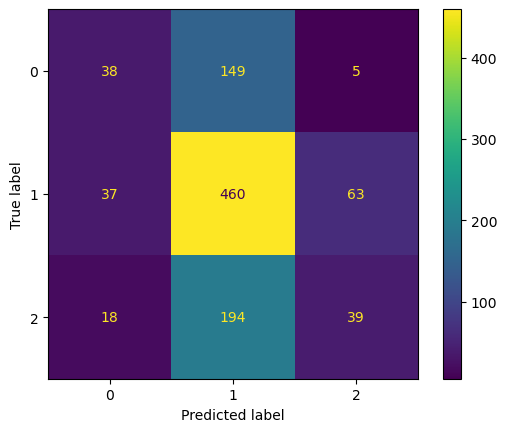

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()